In [1]:
import json
import pandas as pd
from pandas.io.json import json_normalize
import matplotlib.pyplot as plt


In [2]:
teams = pd.read_json(r"C:\Users\Admin\Desktop\ADM\HW2\teams.json")
players = pd.read_json(r"C:\Users\Admin\Desktop\ADM\HW2\players.json")
coaches = pd.read_json(r"C:\Users\Admin\Desktop\ADM\HW2\coaches.json")

events_England = pd.read_json(r"C:\Users\Admin\Desktop\ADM\HW2\events\events_England.json")
events_European_Championship = pd.read_json(r"C:\Users\Admin\Desktop\ADM\HW2\events\events_European_Championship.json")
events_France = pd.read_json(r"C:\Users\Admin\Desktop\ADM\HW2\events\events_France.json")
events_Germany = pd.read_json(r"C:\Users\Admin\Desktop\ADM\HW2\events\events_Germany.json")
events_Italy = pd.read_json(r"C:\Users\Admin\Desktop\ADM\HW2\events\events_Italy.json")
events_Spain = pd.read_json(r"C:\Users\Admin\Desktop\ADM\HW2\events\events_Spain.json")
events_World_Cup = pd.read_json(r"C:\Users\Admin\Desktop\ADM\HW2\events\events_World_Cup.json")

In [3]:
#Normalize data in order get Player names
df_players_birthArea=pd.DataFrame(json_normalize(players['birthArea']))
df_players_passportArea=pd.DataFrame(json_normalize(players['passportArea']))
df_players_role=pd.DataFrame(json_normalize(players['role']))

In [4]:
df_players = pd.DataFrame(players)
df_players_F = pd.concat([df_players_birthArea, df_players.loc[:,'birthDate':'middleName'],df_players_passportArea,df_players_role,df_players.loc[:,'shortName':'wyId']], axis=1, join='inner')

In [5]:
#convert all json Event files to the DataFrame and merge them
df_events_England=pd.DataFrame(events_England)
df_events_European_Championship=pd.DataFrame(events_European_Championship)
df_events_France=pd.DataFrame(events_France)
df_events_Germany=pd.DataFrame(events_Germany)
df_events_Italy=pd.DataFrame(events_Italy)
df_events_Spain=pd.DataFrame(events_Spain)
df_events_World_Cup=pd.DataFrame(events_World_Cup)

In [6]:
df_events_F = pd.concat([df_events_England, df_events_European_Championship, df_events_France, df_events_Germany, df_events_Italy,df_events_Spain,df_events_World_Cup],axis=0, join='inner')

In [7]:
df_events_F

,eventId,eventName,eventSec,id,matchId,matchPeriod,playerId,positions,subEventId,subEventName,tags,teamId
0,8,Pass,2.758649,177959171,2499719,1H,25413,"[{'y': 49, 'x': 49}, {'y': 78, 'x': 31}]",85,Simple pass,[{'id': 1801}],1609
1,8,Pass,4.946850,177959172,2499719,1H,370224,"[{'y': 78, 'x': 31}, {'y': 75, 'x': 51}]",83,High pass,[{'id': 1801}],1609
2,8,Pass,6.542188,177959173,2499719,1H,3319,"[{'y': 75, 'x': 51}, {'y': 71, 'x': 35}]",82,Head pass,[{'id': 1801}],1609
3,8,Pass,8.143395,177959174,2499719,1H,120339,"[{'y': 71, 'x': 35}, {'y': 95, 'x': 41}]",82,Head pass,[{'id': 1801}],1609
4,8,Pass,10.302366,177959175,2499719,1H,167145,"[{'y': 95, 'x': 41}, {'y': 88, 'x': 72}]",85,Simple pass,[{'id': 1801}],1609
5,8,Pass,12.548934,177959177,2499719,1H,3319,"[{'y': 88, 'x': 72}, {'y': 75, 'x': 77}]",85,Simple pass,[{'id': 1802}],1609
6,8,Pass,13.961228,177959186,2499719,1H,8653,"[{'y': 25, 'x': 23}, {'y': 15, 'x': 39}]",82,Head pass,[{'id': 1801}],1631
7,1,Duel,14.765321,177959189,2499719,1H,8013,"[{'y': 15, 'x': 39}, {'y': 20, 'x': 33}]",10,Air duel,"[{'id': 701}, {'id': 1802}]",1631
8,1,Duel,14.765321,177961218,2499719,1H,0,"[{'y': 85, 'x': 61}, {'y': 80, 'x': 67}]",10,Air duel,"[{'id': 703}, {'id': 1801}]",1609
9,8,Pass,15.320341,177959178,2499719,1H,167145,"[{'y': 80, 'x': 67}, {'y': 61, 'x': 59}]",82,Head pass,"[{'id': 1401}, {'id': 1801}]",1609


In [8]:
#df_players_F.head(5)

In [9]:
#select columns
df_events_id = pd.DataFrame(df_events_F, columns = ["playerId","subEventName"])

In [10]:
#Select 'Air duel' events only
df_events_id=df_events_id[df_events_id.subEventName=="Air duel"]

In [11]:
#count freq. in order to apply threshold and select passes more than 100 per player
df_events_id_2=(df_events_id.groupby('playerId').count()>20)

In [12]:
df_events_id_2.head(5)

,subEventName
playerId,
0,True
12,False
36,True
38,False
45,False


In [13]:
df_events_F.head(5)

,eventId,eventName,eventSec,id,matchId,matchPeriod,playerId,positions,subEventId,subEventName,tags,teamId
0,8,Pass,2.758649,177959171,2499719,1H,25413,"[{'y': 49, 'x': 49}, {'y': 78, 'x': 31}]",85,Simple pass,[{'id': 1801}],1609
1,8,Pass,4.946850,177959172,2499719,1H,370224,"[{'y': 78, 'x': 31}, {'y': 75, 'x': 51}]",83,High pass,[{'id': 1801}],1609
2,8,Pass,6.542188,177959173,2499719,1H,3319,"[{'y': 75, 'x': 51}, {'y': 71, 'x': 35}]",82,Head pass,[{'id': 1801}],1609
3,8,Pass,8.143395,177959174,2499719,1H,120339,"[{'y': 71, 'x': 35}, {'y': 95, 'x': 41}]",82,Head pass,[{'id': 1801}],1609
4,8,Pass,10.302366,177959175,2499719,1H,167145,"[{'y': 95, 'x': 41}, {'y': 88, 'x': 72}]",85,Simple pass,[{'id': 1801}],1609


In [14]:
#select playerid and tags 
df_events_id = pd.DataFrame(df_events_F, columns = ["playerId","tags","subEventName"])
df_events_id=df_events_id[df_events_id.subEventName=="Air duel"]
df_events_id=df_events_id.drop(columns='subEventName')
df_events_id.head(5)

,playerId,tags
7,8013,"[{'id': 701}, {'id': 1802}]"
8,0,"[{'id': 703}, {'id': 1801}]"
12,8653,"[{'id': 703}, {'id': 1801}]"
13,25413,"[{'id': 701}, {'id': 1802}]"
27,192748,"[{'id': 703}, {'id': 1801}]"


In [15]:
# we will store into this dictionary is a playerid as a key 
# and the ratio between completed Air duel and attempted Air duel as a value
# ex. {playerID: ratio}
dict = {}
#In this loop we define a set of individual playerIds and iterate through this set
for playerid in set(df_events_id.playerId):
    # for each playerid we collect all the tags stored in the nested structure of lists and dictionaries
    # and store them in the list "ls"
    ls = list(df_events_id[df_events_id.playerId == playerid].tags)
    # we are going to use the list "fin" to store all the tag values for unique playerid
    fin = []
    for i in ls:
        for j in i:
            # adding each tag value
            fin.append(j['id'])
    # round(fin.count(1801)/len(fin),2) this expression computes the ratio we need.
    # we use ternary conditional operator in order to avoid division by zero
    dict[playerid] = 0 if len(fin)==0 else round(fin.count(1801)/len(fin),2)
print(dict)

{0: 0.19, 8192: 0.33, 368642: 0.28, 57347: 0.37, 344068: 0.36, 344065: 0.4, 8200: 0.4, 122888: 0.0, 344075: 0.21, 393228: 0.31, 12: 0.32, 8213: 0.0, 114709: 0.33, 32793: 0.36, 8221: 0.3, 32798: 0.17, 139295: 0.5, 393247: 0.36, 32803: 0.25, 36: 0.24, 114723: 0.0, 38: 0.32, 122918: 0.17, 45: 0.31, 8239: 0.2, 48: 0.36, 8240: 0.27, 8242: 0.38, 16435: 0.3, 16436: 0.25, 8245: 0.36, 54: 0.24, 245813: 0.09, 56: 0.19, 8249: 0.31, 8246: 0.12, 229427: 0.32, 65596: 0.26, 16443: 0.35, 344120: 0.33, 122940: 0.19, 8247: 0.29, 66: 0.29, 393284: 0.27, 344132: 0.4, 352328: 0.24, 8266: 0.48, 74: 0.31, 8268: 0.16, 376908: 0.36, 77: 0.3, 41034: 0.32, 8272: 0.42, 344140: 0.17, 114762: 0.25, 8277: 0.34, 8278: 0.29, 91: 0.34, 8284: 0.19, 93: 0.27, 8285: 0.26, 8287: 0.27, 41056: 0.3, 97: 0.5, 8290: 0.08, 8291: 0.31, 8292: 0.22, 102: 0.4, 286823: 0.5, 8296: 0.02, 286825: 0.3, 8297: 0.0, 107: 0.32, 8301: 0.5, 110: 0.24, 286831: 0.21, 131184: 0.34, 8303: 0.5, 344178: 0.3, 8307: 0.4, 116: 0.24, 8309: 0.32, 118: 0.

In [16]:
#converting dictionary to a DataFrame
full_list = pd.DataFrame({'success': dict})
full_list.head()

,success
0,0.19
12,0.32
36,0.24
38,0.32
45,0.31


In [17]:
#merge two data frame and select more than 100 attempt
full_list_F= pd.merge(full_list, df_events_id_2, left_index=True, right_index=True)
full_list_F=full_list_F[full_list_F.subEventName==True]
full_list_F=full_list_F.drop(['subEventName'], axis=1)
full_list_F.head(5)

,success
0,0.19
36,0.24
48,0.36
54,0.24
66,0.29


In [18]:
df_players_F

,alpha2code,alpha3code,id,name,birthDate,currentNationalTeamId,currentTeamId,firstName,foot,height,...,alpha2code,alpha3code,id,name,code2,code3,name,shortName,weight,wyId
0,TR,TUR,792,Turkey,1989-06-17,4687,4502,Harun,right,187,...,TR,TUR,792,Turkey,GK,GKP,Goalkeeper,H. Tekin,78,32777
1,FR,FRA,250,France,1999-01-23,4423,3775,Malang,left,182,...,SN,SEN,686,Senegal,DF,DEF,Defender,M. Sarr,73,393228
2,FR,FRA,250,France,1998-10-26,null,3772,Over,,176,...,FR,FRA,250,France,GK,GKP,Goalkeeper,O. Mandanda,72,393230
3,FR,FRA,250,France,1990-03-06,19314,683,Alfred John Momar,right,187,...,SN,SEN,686,Senegal,MD,MID,Midfielder,A. N'Diaye,82,32793
4,FR,FRA,250,France,1999-05-25,null,2975,Ibrahima,right,192,...,FR,FRA,250,France,DF,DEF,Defender,I. Konat\u00e9,84,393247
5,NL,NLD,528,Netherlands,1989-04-22,664,676,Jasper,right,185,...,NL,NLD,528,Netherlands,GK,GKP,Goalkeeper,J. Cillessen,83,33
6,BE,BEL,56,Belgium,1989-03-02,5629,1624,Toby,right,187,...,BE,BEL,56,Belgium,DF,DEF,Defender,T. Alderweireld,91,36
7,BE,BEL,56,Belgium,1987-04-24,5629,1624,Jan,left,189,...,BE,BEL,56,Belgium,DF,DEF,Defender,J. Vertonghen,88,48
8,FR,FRA,250,France,1994-08-09,null,3783,Alexander,right,182,...,FR,FRA,250,France,DF,DEF,Defender,A. Djiku,74,229427
9,DK,DNK,208,Denmark,1992-02-14,7712,1624,Christian,right,180,...,DK,DNK,208,Denmark,MD,MID,Midfielder,C. Eriksen,76,54


In [19]:
#adding names of players
df_players_F1 = df_players_F[["shortName","wyId","height"]]
df_players_F1 = df_players_F1.set_index('wyId')
df_pass = full_list_F.sort_values(by='success', ascending=False)
df_air_duel=pd.merge(df_pass, df_players_F1, left_index=True, right_index=True)

In [27]:
df_air_duel.head(10)

,success,shortName,height
15795,0.50,K. Casteels,197
135747,0.50,D. Suba\u0161i\u0107,191
3458,0.48,Sergio Rico,194
10131,0.48,J. Pickford,185
12242,0.48,N. Pope,192
8266,0.48,Gomes,191
7882,0.47,P. \u010cech,196
7847,0.47,\u0141. Fabia\u0144ski,190
20519,0.45,A. Ranocchia,195
83574,0.45,C. T\u0103t\u0103ru\u0219anu,196


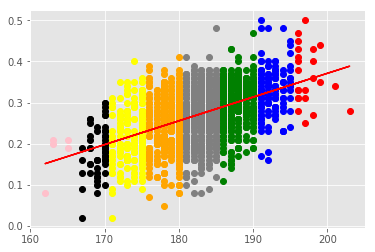

In [32]:
from scipy import stats
import numpy as np
heightlist = list(df_air_duel.height)
successlist = list(df_air_duel.success)
slope, intercept, r_value, p_value, std_err = stats.linregress(heightlist, successlist)
def predict(x):
       return slope * x + intercept
fitLine = predict(np.array(heightlist))
for k in range(len(heightlist)):
    if heightlist[k] <= 165 : 
        plt.plot(heightlist[k],successlist[k],'o',color = 'pink')
    elif heightlist[k] > 165 and heightlist[k] <= 170  : 
        plt.plot(heightlist[k],successlist[k],'o',color = 'black')
    elif heightlist[k] > 170 and heightlist[k] <= 175  : 
        plt.plot(heightlist[k],successlist[k],'o',color = 'yellow')
    elif heightlist[k] > 175 and heightlist[k] <= 180  : 
        plt.plot(heightlist[k],successlist[k],'o',color = 'orange')
    elif heightlist[k] > 180 and heightlist[k] <= 185  : 
        plt.plot(heightlist[k],successlist[k],'o',color = 'grey')
    elif heightlist[k] > 185 and heightlist[k] <= 190  : 
        plt.plot(heightlist[k],successlist[k],'o',color = 'green')
    elif heightlist[k] > 190 and heightlist[k] <= 195  : 
        plt.plot(heightlist[k],successlist[k],'o',color = 'blue')
    else : 
        plt.plot(heightlist[k],successlist[k],'o',color = 'red')
plt.plot(heightlist, fitLine, c='r')